<a href="https://www.kaggle.com/code/kheprydesousa/titanic-visualiza-o-de-dados?scriptVersionId=115166377" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Visualização de dados Titanic
1. Instalando Bibliotecas
2. Entendendo valores
 > campos do nosso dataSet
3. Tratando dados
    1. Nullos
    2. Embarked, Q, S e c
    > Melhorias nos campos de embarque substituido as iniciais pelo os nomes das respectivas cidades
    >
    > Mudando o campo Survived 
4. Plotly 
    > Basico utilizando Plotly.Express

## Bibliotecas

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanicvisualizao-de-dados/train.csv


In [2]:
import seaborn as sns

In [3]:
!pip install plotly
import plotly.express as px

## Adicionando os arquivos ao ambiente

In [4]:
titanic = pd.read_csv("../input/titanicvisualizao-de-dados/train.csv")
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


## Entendendo os valores:

### Tabelas : 
  1.  survival - Survival (0 = No; 1 = Yes)
  2.  class - Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd)
  3.  name - Name
  4.  sex - Sex
  5.  age - Age
  6.  sibsp - Number of Siblings/Spouses Aboard
  7.  parch - Number of Parents/Children Aboard
  8.  ticket - Ticket Number
  9.  fare - Passenger Fare
  10. cabin - Cabin
  11.  embarked - Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)
  12.  boat - Lifeboat (if survived)
  13.  body - Body number (if did not survive and body was recovered)

## Tratando os dados

In [5]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Precisamos de mais dados descritivos para nos ambientar com os dados, quando houver um grande volume de dados checar dado p/ dado não seria interessante logo, aplicaremos alguns metodos para alcançar o mesmo.

In [6]:
titanic.describe()# comando para descrever os dados de forma geral
# basta executr em outra coluna para ver seu resultado.
titanic.isnull().sum()
#porque não count ao invez de sum()
# o count vai contar as linhas e o sum vai pegar o retorno do isnull (1 ou 0) e somar ;)


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

### Nulos:
>Cabin tendo 687 nullos não será um problema para a gente já que mais de uma pessoa pode está em uma cabine
>e não estamos observando o volume de pessoas por cabine, então GG
>
>Embarque apenas 2,não é uma perda considerável
>
>Age com 177 perdas veremos o que podemos fazer

### Tratando de Nullos
* Métodos Aplicaveis

>1. Dropar a coluna que contenha dados nulos;
>
>2. Dropar apenas as linhas com dados nulos;
>
>3. Substituir pela média da coluna;
>
>4. Substituir por um valor fixo

os nullos são uma perda de 19.9%



In [7]:
titanic['Age'].fillna("Não preenchido",inplace=True)
 # inplace = no lugar

<AxesSubplot:xlabel='Sex', ylabel='count'>

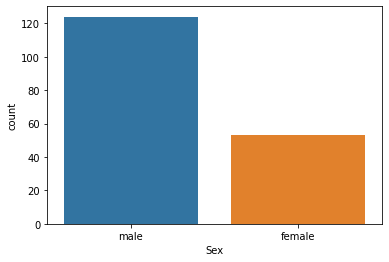

In [8]:
v = titanic.loc[titanic['Age'] == "Não preenchido"]#Ids não preenchidas
#vamos visualizar isso melhor
sns.countplot(data=v, x='Sex')
#proporção de dados não preenchidos no campo idade (Age) por sexo

### Embarked = Q,S e C ? 
>As iniciais do nome das cidades onde embarcaram no navio Titanic
que tal se usarmos o seus nomes reais no lugar ?
>
>C = Cherbourg; Q = Queenstown; S = Southampton

In [9]:
#Utilizando Lambda function
titanic['Embarked'] = ['Cherbourg' if y == 'C' else 'Queenstown' if y == 'Q'  else 'Southampton'  for y in titanic['Embarked']]
titanic['Embarked']

0      Southampton
1        Cherbourg
2      Southampton
3      Southampton
4      Southampton
          ...     
886    Southampton
887    Southampton
888    Southampton
889      Cherbourg
890     Queenstown
Name: Embarked, Length: 891, dtype: object

* Alterando campo de sobreviventes para melhor entendimento

In [10]:
titanic['Survived'] = ['Vivo' if y == 1 else 'Não Sobreviveu'  for y in titanic['Survived']]

## Visualizando dados


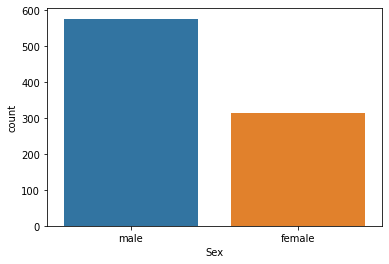

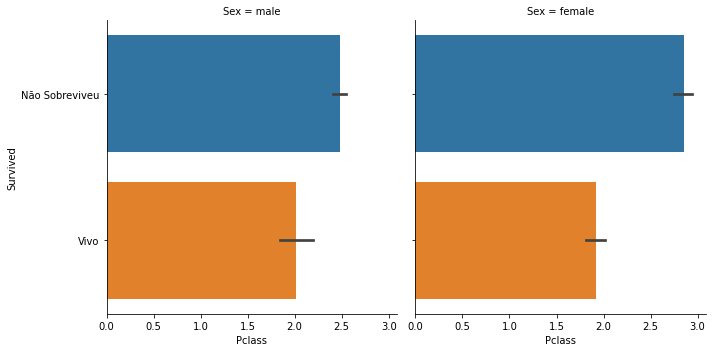

In [11]:
# Quantidade max de passageiros abordo por sexo

sns.countplot(data=titanic, x='Sex')

# Numero de sobreviventes por classe e sexo
sns.catplot(
    data=titanic, x="Pclass", y="Survived", col="Sex",
    kind="bar"
)

## Utilizando Plotly.Express

In [12]:
#Vamos começar com os feitos anteriomente com essa outra biblioteca 
#Note que os graficos são interativos

px.histogram(titanic, x='Sex')

In [13]:
#Grafico de tripulantes por sex
px.histogram(titanic, 
        x = ["Sex","Embarked"],color='Sex',
        
        barmode ='group' 
          )

In [14]:
#Grafico de tripulantes por cidade e por classe social
px.histogram(titanic, 
        x = ["Embarked"],color='Pclass',
        
        barmode ='group' 
          )

In [15]:
#Afinal, onde está os sobreviventes ?

px.histogram(titanic, 
        x = ["Embarked"],color='Survived',
        
        barmode ='group' 
          )